In [1]:
#Importando as Bibliotecas
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import itertools

In [2]:
#Extração dos dados do IDIV com Pandas
url_idiv = "https://www.dadosdemercado.com.br/bolsa/indices/IDIV"  
tabela_idiv = pd.read_html(url_idiv)  

tabela_idiv

[    Código Part. no índice      Volume  Última (R$) Variação  Unnamed: 5
 0    PETR4           5,55%  47.913.000         3351   +2,38%         NaN
 1    VALE3           5,04%  22.686.900         6686   +1,46%         NaN
 2    PETR3           4,97%  11.728.400         3637   +2,51%         NaN
 3    CPLE6           4,92%  14.721.900          834   -0,12%         NaN
 4    GGBR4           4,83%   9.983.800         2267   +0,00%         NaN
 5    BBAS3           4,38%  20.527.400         4885   +4,07%         NaN
 6    CMIG4           4,02%   6.908.700         1212   -0,66%         NaN
 7    BBSE3           3,73%   4.129.400         3207   +0,41%         NaN
 8    VIVT3           3,53%   2.243.800         4484   +0,27%         NaN
 9    CPLE3           3,52%   5.680.100          780   +0,52%         NaN
 10  KLBN11           3,15%   4.258.700         2350   -0,13%         NaN
 11   JBSS3           3,05%  10.064.300         1817   -0,22%         NaN
 12   EGIE3           3,00%   1.279.10

In [3]:
#Extração do Código e Participação dos Tickers do índice
tickers_idiv = [item['Código'] for item in tabela_idiv]
participacao_idiv = [item['Part. no índice'] for item in tabela_idiv]

#Transformação dos dados em lista utilizando o itertools
lista_tickers = list(itertools.chain.from_iterable(tickers_idiv))
lista_part = list(itertools.chain.from_iterable(participacao_idiv))

In [4]:
#Lista dos Tickers
print(lista_tickers,end='')

['PETR4', 'VALE3', 'PETR3', 'CPLE6', 'GGBR4', 'BBAS3', 'CMIG4', 'BBSE3', 'VIVT3', 'CPLE3', 'KLBN11', 'JBSS3', 'EGIE3', 'SANB11', 'TAEE11', 'GOAU4', 'CMIG3', 'TRPL4', 'B3SA3', 'ITSA4', 'CPFE3', 'CXSE3', 'BRAP4', 'FLRY3', 'CSNA3', 'CMIN3', 'PSSA3', 'ALUP11', 'AURE3', 'UNIP6', 'USIM5', 'CSMG3', 'BRSR6', 'BEEF3', 'MRFG3', 'RAPT4', 'KEPL3', 'FESA4', 'DIRR3', 'LEVE3', 'GRND3', 'AGRO3', 'ABCB4', 'JHSF3', 'RANI3', 'TASA4', 'TGMA3', 'ROMI3', 'LAVV3', 'WIZC3', 'TRIS3']

In [5]:
#Lista da Participação dos Tickers no Índice
print(lista_part,end='')

['5,55%', '5,04%', '4,97%', '4,92%', '4,83%', '4,38%', '4,02%', '3,73%', '3,53%', '3,52%', '3,15%', '3,05%', '3,00%', '2,63%', '2,62%', '2,44%', '2,38%', '2,37%', '2,37%', '2,22%', '2,20%', '2,04%', '1,94%', '1,88%', '1,88%', '1,82%', '1,69%', '1,46%', '1,43%', '1,25%', '1,15%', '1,12%', '0,84%', '0,74%', '0,70%', '0,68%', '0,67%', '0,67%', '0,67%', '0,63%', '0,61%', '0,60%', '0,46%', '0,43%', '0,42%', '0,37%', '0,27%', '0,19%', '0,18%', '0,14%', '0,12%']

In [6]:
#Transforação dos itens de string para float
part_ajustada = [valor.replace('%', '').replace(',', '.') for valor in lista_part]
part_ajustada = lista_floats = [float(valor) for valor in part_ajustada]

print(part_ajustada,end='')

[5.55, 5.04, 4.97, 4.92, 4.83, 4.38, 4.02, 3.73, 3.53, 3.52, 3.15, 3.05, 3.0, 2.63, 2.62, 2.44, 2.38, 2.37, 2.37, 2.22, 2.2, 2.04, 1.94, 1.88, 1.88, 1.82, 1.69, 1.46, 1.43, 1.25, 1.15, 1.12, 0.84, 0.74, 0.7, 0.68, 0.67, 0.67, 0.67, 0.63, 0.61, 0.6, 0.46, 0.43, 0.42, 0.37, 0.27, 0.19, 0.18, 0.14, 0.12]

In [7]:
#Validando que a soma da participação é igual a 100%
sum(part_ajustada)

99.97000000000001

In [8]:
#Ajustando a lista de Tickers no formato do Yahoo Finance XXXX.SA
lista_ajustada = []

for s in lista_tickers:
    lista_ajustada.append(s + ".SA")
    
print(lista_ajustada,end='')

['PETR4.SA', 'VALE3.SA', 'PETR3.SA', 'CPLE6.SA', 'GGBR4.SA', 'BBAS3.SA', 'CMIG4.SA', 'BBSE3.SA', 'VIVT3.SA', 'CPLE3.SA', 'KLBN11.SA', 'JBSS3.SA', 'EGIE3.SA', 'SANB11.SA', 'TAEE11.SA', 'GOAU4.SA', 'CMIG3.SA', 'TRPL4.SA', 'B3SA3.SA', 'ITSA4.SA', 'CPFE3.SA', 'CXSE3.SA', 'BRAP4.SA', 'FLRY3.SA', 'CSNA3.SA', 'CMIN3.SA', 'PSSA3.SA', 'ALUP11.SA', 'AURE3.SA', 'UNIP6.SA', 'USIM5.SA', 'CSMG3.SA', 'BRSR6.SA', 'BEEF3.SA', 'MRFG3.SA', 'RAPT4.SA', 'KEPL3.SA', 'FESA4.SA', 'DIRR3.SA', 'LEVE3.SA', 'GRND3.SA', 'AGRO3.SA', 'ABCB4.SA', 'JHSF3.SA', 'RANI3.SA', 'TASA4.SA', 'TGMA3.SA', 'ROMI3.SA', 'LAVV3.SA', 'WIZC3.SA', 'TRIS3.SA']

In [9]:
#Definindo o tamanho da série histórica
data_final = datetime.now()
data_inicial = datetime.now() - timedelta(days=365*10)

In [10]:
#Loop para extração e armanezendo dos valores das ações em um dataframe utilizando o Yahoo Finance
tickers = lista_ajustada
p_data = pd.DataFrame()

for t in tickers:
    p_data[t] = yf.download(t, start=data_inicial, end=data_final, progress=False)['Adj Close']

In [11]:
#Dados Extraídos
p_data

,PETR4.SA,VALE3.SA,PETR3.SA,CPLE6.SA,GGBR4.SA,BBAS3.SA,CMIG4.SA,BBSE3.SA,VIVT3.SA,CPLE3.SA,...,AGRO3.SA,ABCB4.SA,JHSF3.SA,RANI3.SA,TASA4.SA,TGMA3.SA,ROMI3.SA,LAVV3.SA,WIZC3.SA,TRIS3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-10,6.035484,18.687500,6.331464,1.376422,10.873835,14.439137,3.818193,11.386661,20.308460,0.805722,...,5.399436,5.537368,4.485034,1.928919,18.748137,16.114727,2.094413,NaN,NaN,1.482434
2013-10-11,6.018859,18.866278,6.324024,1.377331,11.093827,14.374479,3.798900,11.352597,20.745729,0.800326,...,5.426984,5.345580,4.340121,1.928919,18.937510,16.635674,2.106519,NaN,NaN,1.482434
2013-10-14,6.075390,19.743385,6.350065,1.370512,11.219536,14.579222,3.849066,11.479116,20.361898,0.796729,...,5.504119,5.357821,4.180717,1.936064,18.937510,17.205248,2.134768,NaN,NaN,1.482434
2013-10-15,6.125269,19.905399,6.379825,1.372785,11.225821,14.573832,3.814335,11.556973,20.182137,0.794571,...,5.509628,5.549610,4.180717,1.936064,19.505634,17.156622,2.126696,NaN,NaN,1.449491
2013-10-16,6.101992,19.799252,6.316585,1.386422,11.188107,14.897097,3.800829,11.459651,20.565962,0.796369,...,5.537177,5.578174,4.419823,1.921775,19.316261,16.427288,2.158980,NaN,NaN,1.465963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,34.119999,66.989998,37.169998,8.630000,23.780001,47.049999,12.370000,31.940001,43.720001,8.100000,...,28.580000,19.570000,4.560000,11.940000,15.510000,25.299999,11.900000,7.25,5.10,5.110000
2023-10-03,33.970001,66.580002,36.730000,8.470000,23.290001,46.450001,12.090000,32.020000,43.740002,7.960000,...,28.430000,19.440001,4.480000,11.900000,15.350000,24.730000,11.720000,7.02,5.09,4.960000
2023-10-04,32.619999,65.870003,35.619999,8.400000,23.000000,46.799999,12.210000,32.200001,44.209999,7.880000,...,28.780001,19.850000,4.570000,11.940000,15.340000,24.830000,12.000000,7.17,5.13,5.130000


In [12]:
#Calculo do retorno histórico acumulado das ações do índice
retorno_acumulado = (p_data/p_data.iloc[0]-1)*100
retorno_acumulado

,PETR4.SA,VALE3.SA,PETR3.SA,CPLE6.SA,GGBR4.SA,BBAS3.SA,CMIG4.SA,BBSE3.SA,VIVT3.SA,CPLE3.SA,...,AGRO3.SA,ABCB4.SA,JHSF3.SA,RANI3.SA,TASA4.SA,TGMA3.SA,ROMI3.SA,LAVV3.SA,WIZC3.SA,TRIS3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
2013-10-11,-0.275445,0.956670,-0.117510,0.066047,2.023138,-0.447798,-0.505299,-0.299151,2.153138,-0.669645,...,0.510216,-3.463518,-3.231018,0.000000,1.010090,3.232736,0.578034,NaN,NaN,0.000000
2013-10-14,0.661198,5.650222,0.293778,-0.429334,3.179202,0.970171,0.808559,0.811966,0.263133,-1.116087,...,1.938784,-3.242458,-6.785145,0.370386,1.010090,6.767231,1.926780,NaN,NaN,0.000000
2013-10-15,1.487628,6.517187,0.763810,-0.264198,3.236999,0.932840,-0.101039,1.495723,-0.622025,-1.383941,...,2.040811,0.221077,-6.785145,0.370386,4.040390,6.465483,1.541401,NaN,NaN,-2.222208
2013-10-16,1.101947,5.949172,-0.235012,0.726547,2.890175,3.171652,-0.454777,0.641017,1.267952,-1.160732,...,2.551028,0.736926,-1.453954,-0.370362,3.030300,1.939599,3.082825,NaN,NaN,-1.111112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,465.323342,258.474905,487.067959,526.988094,118.690108,225.850484,223.975222,180.503668,115.279744,905.309871,...,429.314589,253.417008,1.671480,518.999507,-17.271777,56.999242,468.178262,NaN,NaN,244.703374
2023-10-03,462.838078,256.280946,480.118561,515.363760,114.183880,221.695121,216.641917,181.206243,115.378227,887.934103,...,426.536528,251.069338,-0.112229,516.925809,-18.125194,53.462107,459.584000,NaN,NaN,234.584873
2023-10-04,440.470322,252.481620,462.587062,510.278062,111.516920,224.119078,219.784762,182.787043,117.692521,878.005126,...,433.018694,258.473575,1.894449,518.999507,-18.178534,54.082659,472.952887,NaN,NaN,246.052505


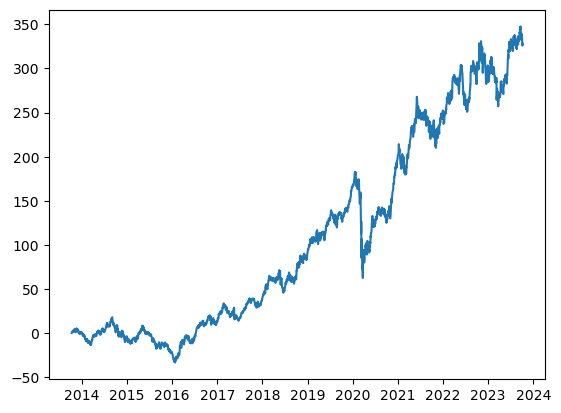

In [13]:
#Calculo do retorno ponderado do índice
retorno_ponderado = retorno_acumulado.multiply(part_ajustada, axis=1)
media_ponderada = retorno_ponderado.sum(axis=1)/100
plt.plot(media_ponderada)

In [14]:
#Extração da série histórica de dividendos pagos
df_dividendos = pd.DataFrame()

for ticker in lista_ajustada:
    d = yf.Ticker(ticker).dividends
    d.index = pd.to_datetime(d.index.date)
    df_dividendos.index = media_ponderada.index
    df_dividendos[ticker] = d 

In [15]:
#Substituindo os NaN por 0
df_dividendos = df_dividendos.fillna(0)
df_dividendos

,PETR4.SA,VALE3.SA,PETR3.SA,CPLE6.SA,GGBR4.SA,BBAS3.SA,CMIG4.SA,BBSE3.SA,VIVT3.SA,CPLE3.SA,...,AGRO3.SA,ABCB4.SA,JHSF3.SA,RANI3.SA,TASA4.SA,TGMA3.SA,ROMI3.SA,LAVV3.SA,WIZC3.SA,TRIS3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-10-11,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-10-14,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-10-15,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-10-16,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,0.0,0.0,0.0,0.334427,0.0,0.0,0.0,0.0,0.0,0.304025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-03,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-04,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


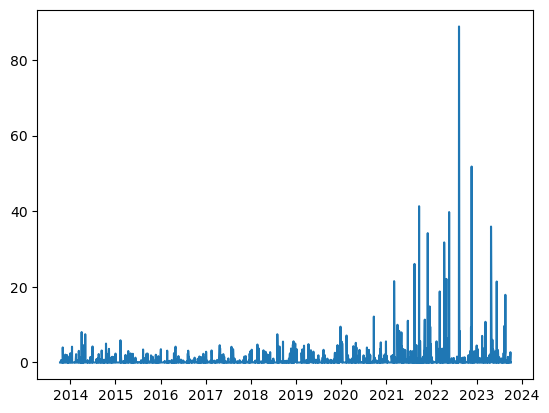

In [16]:
#Calculo dos dividendos ponderados do índice
dividendos_ponderado = df_dividendos.multiply(part_ajustada, axis=1)
media_dividendos = dividendos_ponderado.sum(axis=1)
plt.plot(media_dividendos)

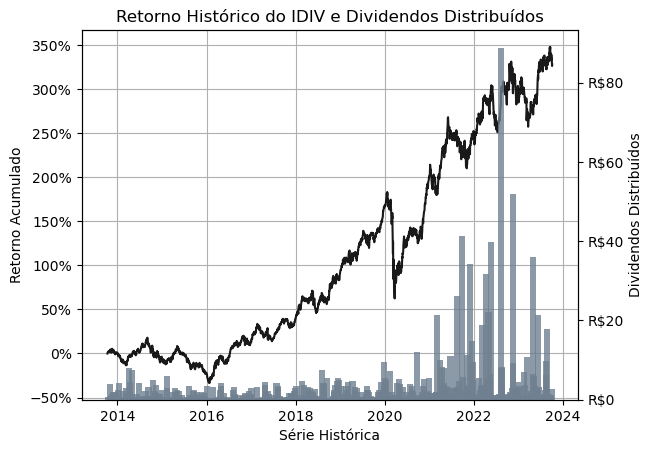

In [17]:
#Gráfico do retorno do índice e da distribuição dos dividendos
fig, ax1 = plt.subplots()

#Título do Gráfico
plt.title('Retorno Histórico do IDIV e Dividendos Distribuídos')

#Configurando o gráfico do retorno
ax1.set_xlabel('Série Histórica')
ax1.set_ylabel('Retorno Acumulado')
ax1.plot(media_ponderada.index, media_ponderada, color = 'black',alpha=0.9)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
plt.grid()

# O twinx é utilizado para que os dois gráficos compartilhem o mesmo eixo (data) porém com y diferentes
ax2 = ax1.twinx()

#Configurando o gráfico dos dividendos
ax2.set_ylabel('Dividendos Distribuídos')
ax2.bar(media_ponderada.index, media_dividendos, color='slategray', width = 50,alpha=0.8)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('R${x:,.0f}'))